In [1]:
import numpy as np
import pandas as pd
import os 
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

### Reading the Dataset


In [2]:
path_ = os.getcwd();
trainset = os.path.join(path_, 'Dataset\\train.csv')
testset = os.path.join(path_, 'Dataset\\test.csv')

In [3]:
train_df = pd.read_csv(trainset)
train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


### Attributes Explain:
- PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
- CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- Destination - The planet the passenger will be debarking to.
- Age - The age of the passenger.
- VIP - Whether the passenger has paid for special VIP service during the voyage.
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- Name - The first and last names of the passenger.
- Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

 Comment: 
 - The PassengerId is a composite Attribute and is decomposed into Passenger_group and Passanger_number.
 - The Cabin is also a composite Attribute and will be decomposed into deck, num and side.

In [4]:
train_df[['Cabin_deck', 'Cabin_num', 'Cabin_side']] = train_df['Cabin'].str.split("/", expand=True)
train_df[['Passanger_group', 'Passanger_num']] = train_df['PassengerId'].str.split('_', expand = True).astype(int)

#### Dropping the `Cabin` `PassengerId` Columns

In [5]:
train_df = train_df.drop(['Cabin', 'PassengerId'], axis = 1)


#### Also Changing VIP DataType to bool

In [6]:
train_df['VIP'] = train_df['VIP'].astype(bool)

<h2><br> Understanding Data <br></h2>

In [7]:
from IPython.display import display, HTML

In [8]:
def dataframe_details(dataframe):
    print("\n\n")
    print(" NUMBER OF ROWS ".center(120,'-'), end = "\n\n")
    print("There are {} total records/rows.\n".format(dataframe.shape[0]))
    
    print(" NUMBER OF Columns ".center(120,'-'), end = "\n\n")
    print("There are {} features/attributes.\n".format(dataframe.shape[1]))
    
    print(" ATTRIBUTES TYPES ".center(120,'-'), end = "\n\n")
    print(dataframe.dtypes)
    
    print(" HEAD ".center(120,'-'), end = "\n\n")
    display(HTML(dataframe.head().to_html()))
    print("\n")
    
    print(" TAIL ".center(120,'-'), end = "\n\n")
    display(HTML(dataframe.tail().to_html()))
    print("\n")
    
    print(" NULL VALUES ".center(120,'-'), end = "\n\n")
    print(dataframe.isna().sum())
    

In [9]:
dataframe_details(train_df)




---------------------------------------------------- NUMBER OF ROWS ----------------------------------------------------

There are 8693 total records/rows.

-------------------------------------------------- NUMBER OF Columns ---------------------------------------------------

There are 17 features/attributes.

--------------------------------------------------- ATTRIBUTES TYPES ---------------------------------------------------

HomePlanet          object
CryoSleep           object
Destination         object
Age                float64
VIP                   bool
RoomService        float64
FoodCourt          float64
ShoppingMall       float64
Spa                float64
VRDeck             float64
Name                object
Transported           bool
Cabin_deck          object
Cabin_num           object
Cabin_side          object
Passanger_group      int32
Passanger_num        int32
dtype: object
--------------------------------------------------------- HEAD ------------------------

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_deck,Cabin_num,Cabin_side,Passanger_group,Passanger_num
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P,1,1
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S,2,1
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S,3,1
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S,3,2
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S,4,1




--------------------------------------------------------- TAIL ---------------------------------------------------------



,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_deck,Cabin_num,Cabin_side,Passanger_group,Passanger_num
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98,P,9276,1
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S,9278,1
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500,S,9279,1
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608,S,9280,1
8692,Europa,False,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True,E,608,S,9280,2




----------------------------------------------------- NULL VALUES ------------------------------------------------------

HomePlanet         201
CryoSleep          217
Destination        182
Age                179
VIP                  0
RoomService        181
FoodCourt          183
ShoppingMall       208
Spa                183
VRDeck             188
Name               200
Transported          0
Cabin_deck         199
Cabin_num          199
Cabin_side         199
Passanger_group      0
Passanger_num        0
dtype: int64


->  So we got null values in the Dataset. We first Start Cleaning it to make accurate prediction.

In [22]:
train_df['Passanger_num'].value_counts()

1    6217
2    1412
3     571
4     231
5     128
6      75
7      46
8      13
Name: Passanger_num, dtype: int64

In [25]:
train_df['Passanger_group'].nunique()

6217

- Findings: In a Group of Passanger, there are maximum 8 Passanger. Total Count of Groups are 6217.

In [10]:
train_df [ train_df['HomePlanet'].isna() ]

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_deck,Cabin_num,Cabin_side,Passanger_group,Passanger_num
59,NaN,True,TRAPPIST-1e,33.0,False,0.0,0.0,NaN,0.0,0.0,Colatz Keen,True,E,3,S,64,2
113,NaN,False,TRAPPIST-1e,39.0,False,0.0,2344.0,0.0,65.0,6898.0,Batan Coning,False,A,0,P,119,1
186,NaN,True,55 Cancri e,24.0,False,0.0,0.0,NaN,0.0,0.0,Arraid Inicont,True,D,6,P,210,1
225,NaN,False,TRAPPIST-1e,18.0,False,313.0,1.0,691.0,283.0,0.0,Almone Sté,False,F,46,S,242,1
234,NaN,True,55 Cancri e,54.0,False,0.0,0.0,0.0,0.0,0.0,Diphah Amsive,True,C,11,S,251,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8515,NaN,False,TRAPPIST-1e,25.0,False,1258.0,0.0,22.0,19.0,0.0,Jurs Mone,False,E,582,P,9084,1
8613,NaN,False,55 Cancri e,53.0,False,0.0,4017.0,0.0,13.0,3147.0,NaN,False,E,603,S,9194,1
8666,NaN,False,55 Cancri e,38.0,True,28.0,1208.0,973.0,207.0,0.0,Gian Perle,True,F,1792,S,9248,1
8674,NaN,False,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False,F,1892,P,9257,1


In [11]:
train_df.isna().sum()

HomePlanet         201
CryoSleep          217
Destination        182
Age                179
VIP                  0
RoomService        181
FoodCourt          183
ShoppingMall       208
Spa                183
VRDeck             188
Name               200
Transported          0
Cabin_deck         199
Cabin_num          199
Cabin_side         199
Passanger_group      0
Passanger_num        0
dtype: int64

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HomePlanet       8492 non-null   object 
 1   CryoSleep        8476 non-null   object 
 2   Destination      8511 non-null   object 
 3   Age              8514 non-null   float64
 4   VIP              8693 non-null   bool   
 5   RoomService      8512 non-null   float64
 6   FoodCourt        8510 non-null   float64
 7   ShoppingMall     8485 non-null   float64
 8   Spa              8510 non-null   float64
 9   VRDeck           8505 non-null   float64
 10  Name             8493 non-null   object 
 11  Transported      8693 non-null   bool   
 12  Cabin_deck       8494 non-null   object 
 13  Cabin_num        8494 non-null   object 
 14  Cabin_side       8494 non-null   object 
 15  Passanger_group  8693 non-null   int32  
 16  Passanger_num    8693 non-null   int32  
dtypes: bool(2), fl

In [13]:
train_df['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [14]:
train_df['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [15]:
train_df[ train_df['VIP'] == True] [["VIP","Transported"]]

,VIP,Transported
2,True,False
38,True,False
102,True,True
108,True,True
120,True,False
...,...,...
8621,True,False
8630,True,True
8652,True,True
8666,True,True


<AxesSubplot:xlabel='VIP', ylabel='count'>

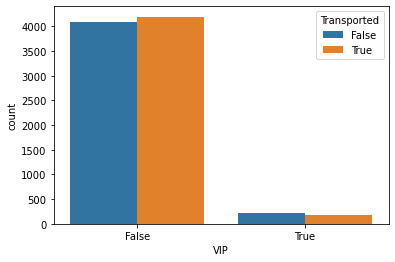

In [16]:
sns.countplot(x = 'VIP'  ,hue = 'Transported' ,data = train_df)

<AxesSubplot:>

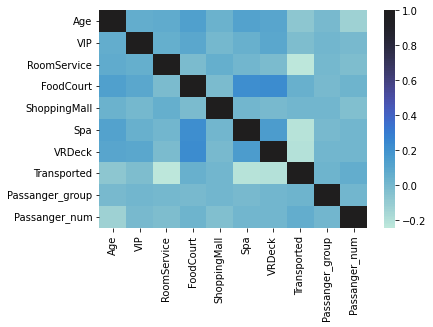

In [17]:
sns.heatmap(train_df.corr(), center = True)

<AxesSubplot:>

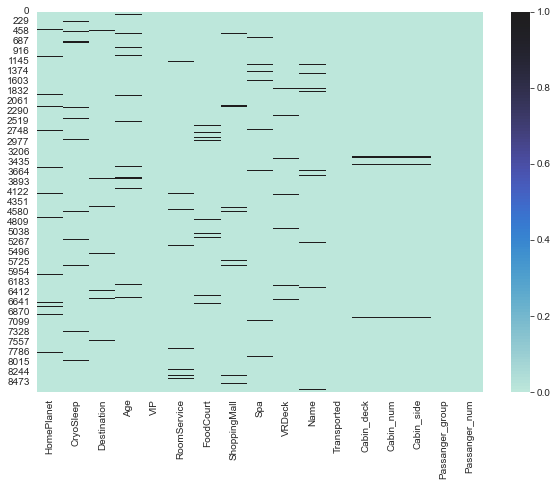

In [18]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,7))
sns.heatmap(train_df.isna(), center= True)


In [19]:
train_df.isna().sum()

HomePlanet         201
CryoSleep          217
Destination        182
Age                179
VIP                  0
RoomService        181
FoodCourt          183
ShoppingMall       208
Spa                183
VRDeck             188
Name               200
Transported          0
Cabin_deck         199
Cabin_num          199
Cabin_side         199
Passanger_group      0
Passanger_num        0
dtype: int64